<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/ML_Exp_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

african_ele_page = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")
print(african_ele_page.content)
african_ele_soup = BeautifulSoup(african_ele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
indian_ele_page = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")
print(indian_ele_page.content)

from bs4 import BeautifulSoup
indian_ele_soup = BeautifulSoup(indian_ele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm1.static.flickr.com/105/296581628_44650d2459.jpg\r\nhttp://farm1.static.flickr.com/76/155881333_9d7e131ae0.jpg\r\nhttp://farm3.static.flickr.com/2279/2104779529_6150d71359.jpg\r\nhttp://farm1.static.flickr.com/200/528406781_dbf9f35bc6.jpg\r\nhttp://static.flickr.com/1166/1022044420_8470e1dba4.jpg\r\nhttp://farm3.static.flickr.com/2164/2136965828_9ccecc5461.jpg\r\nhttp://farm2.static.flickr.com/1276/557914929_5fd3b8eda8.jpg\r\nhttp://farm3.static.flickr.com/2064/2044766644_d2c5fbf0ab.jpg\r\nhttp://www.biolib.cz/IMG/GAL/27218.jpg\r\nhttp://farm2.static.flickr.com/1185/526679603_0e9260f904.jpg\r\nhttp://www.meyers-naturfoto.de/bilder/elefant08.jpg\r\nhttp://farm1.static.flickr.com/176/439344604_4deac55c4d.jpg\r\nhttp://farm1.static.flickr.com/42/120699816_9d908f29aa.jpg\r\nhttp://farm1.static.flickr.com/72/212931942_94a360269d.jpg\r\nhttp://farm3.static.flickr.com/2400/2048284166_ea8b1cea22.jpg\r\nhttp://farm2.static.flickr.com/1207/997600165_5453a73a16.jpg\r\nhttp://www.orus

In [ ]:
#code part 2
ae_str_soup=str(african_ele_soup)#convert soup to string so it can be split
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(ae_split_urls))#print the length of the list so you know how many urls you have

#code part 2.2
ie_str_soup=str(indian_ele_soup)#convert soup to string so it can be split
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(ie_split_urls))

2278
1650


In [ ]:
!mkdir /content/ele_train/ 
!mkdir /content/ele_test/ 

img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

n_of_training_images=150#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
 
    if(progress%20==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ele_train/african.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ele_train/indian.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None
for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ele_train/indian.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140


In [ ]:
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ele_test/african.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/ele_test/indian.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
0
20
40


In [ ]:
# Path to the train folder
import os
original_train = '/content/ele_train/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'african':
        categories.append('0')
    else:
        categories.append('1')

In [ ]:
import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})

data.to_csv("original_elephant.csv",index=False)

In [ ]:
# Path to the test folder
import os
original_test = '/content/ele_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'african':
        categories.append('0')
    else:
        categories.append('1')

import pandas as pd
data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_elephant_test.csv",index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90,
        validation_split=0.33)






train_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=data_test,
directory="/content/ele_test/",
x_col="filename",
y_col=None,
batch_size=10,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

Found 124 validated image filenames belonging to 2 classes.
Found 61 validated image filenames belonging to 2 classes.
Found 65 validated image filenames.


In [ ]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size



model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(512, (150, 150), padding="valid", activation="relu", input_shape=(150, 150, 3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [==============================] - 7s 618ms/step - loss: 0.6813 - accuracy: 0.5965 - val_loss: 0.6734 - val_accuracy: 0.6000
Epoch 3/10
12/12 [==============================] - 7s 623ms/step - loss: 0.6788 - accuracy: 0.6053 - val_loss: 0.6760 - val_accuracy: 0.6000
Epoch 4/10
12/12 [==============================] - 7s 614ms/step - loss: 0.7099 - accuracy: 0.5000 - val_loss: 0.6745 - val_accuracy: 0.6000
Epoch 5/10
12/12 [==============================] - 7s 612ms/step - loss: 0.7115 - accuracy: 0.5789 - val_loss: 0.6706 - val_accuracy: 0.6000
Epoch 6/10
12/12 [==============================] - 7s 621ms/step - loss: 0.6815 - accuracy: 0.5789 - val_loss: 0.6758 - val_accuracy: 0.6000
Epoch 7/10
12/12 [==============================] - 7s 619ms/step - loss: 0.6763 - accuracy: 0.5965 - val_loss: 0.6703 - val_accuracy: 0.6167
Epoch 8/10
12/12 [==============================] - 7s 621ms/step - loss

In [ ]:
model.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_TEST)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.6702314019203186, 0.6000000238418579]

In [ ]:
from sklearn.metrics import roc_auc_score

# AUC for prediction on validation sample
X_val_sample, val_labels = next(validation_generator)
val_pred = model.predict_proba(X_val_sample)
val_pred = np.reshape(val_pred, val_labels.shape)
val_score_auc = roc_auc_score(val_labels, val_pred)
print ("AUC validation score")
print (val_score_auc)
print ('\n')

Instructions for updating:
Please use `model.predict()` instead.
AUC validation score
0.7083333333333334




In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator)

predictions = []
for i in pred:
    if i >=0.5:
        predictions.append('1')
    else:
        predictions.append('0')
 
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})


results.to_csv("results_catsdogs_test.csv",index=False)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


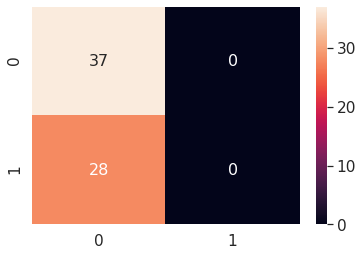

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(data_test['label'],results['Predictions'])

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()